The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [41]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Start coding here!

In [42]:
df = pd.read_csv('data/nobel.csv')

In [43]:
def describe_data(df):
    print(f"Head of the dataframe: {df.head()}")
    print("="*50)
    print(f"shape: {df.shape}")
    print("="*50)
    print(f'description: {df.describe()}')
    print("="*50)
    print(f"missing values: {df.isna().sum()}")
    print("="*50)

describe_data(df)
    

Head of the dataframe:    year    category  ... death_city death_country
0  1901   Chemistry  ...     Berlin       Germany
1  1901  Literature  ...   Châtenay        France
2  1901    Medicine  ...    Marburg       Germany
3  1901       Peace  ...     Heiden   Switzerland
4  1901       Peace  ...      Paris        France

[5 rows x 18 columns]
shape: (1000, 18)
description:               year  laureate_id
count  1000.000000  1000.000000
mean   1973.721000   509.099000
std      34.523195   298.130617
min    1901.000000     1.000000
25%    1949.750000   250.750000
50%    1979.000000   500.500000
75%    2003.000000   764.250000
max    2023.000000  1034.000000
missing values: year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               32
birth_city               36
birth_country            31
sex        

In [44]:
#storing the values counts os sex index =0 element as top gender
top_gender=df['sex'].value_counts().index[0]
top_gender

'Male'

In [45]:
#storing the value counts of birth_country's index element as top_country
top_country = df['birth_country'].value_counts().index[0]
top_country

'United States of America'

In [46]:
#calculate the proportion of usa male nobel prize winners
df['usa_born_winner'] = df['birth_country']=='United States of America'
df['decade'] = (np.floor(df['year']/10)*10).astype(int)
prop_usa_winners = df.groupby('decade', as_index =False)['usa_born_winner'].mean()

In [47]:
# Identify the decade with the highest proportion of US-born winners
max_decade_usa = prop_usa_winners[prop_usa_winners['usa_born_winner'] == prop_usa_winners['usa_born_winner'].max()]['decade'].values[0]
max_decade_usa

2000

In [48]:
df['laureate_type'].value_counts()

Individual      966
Organization     34
Name: laureate_type, dtype: int64

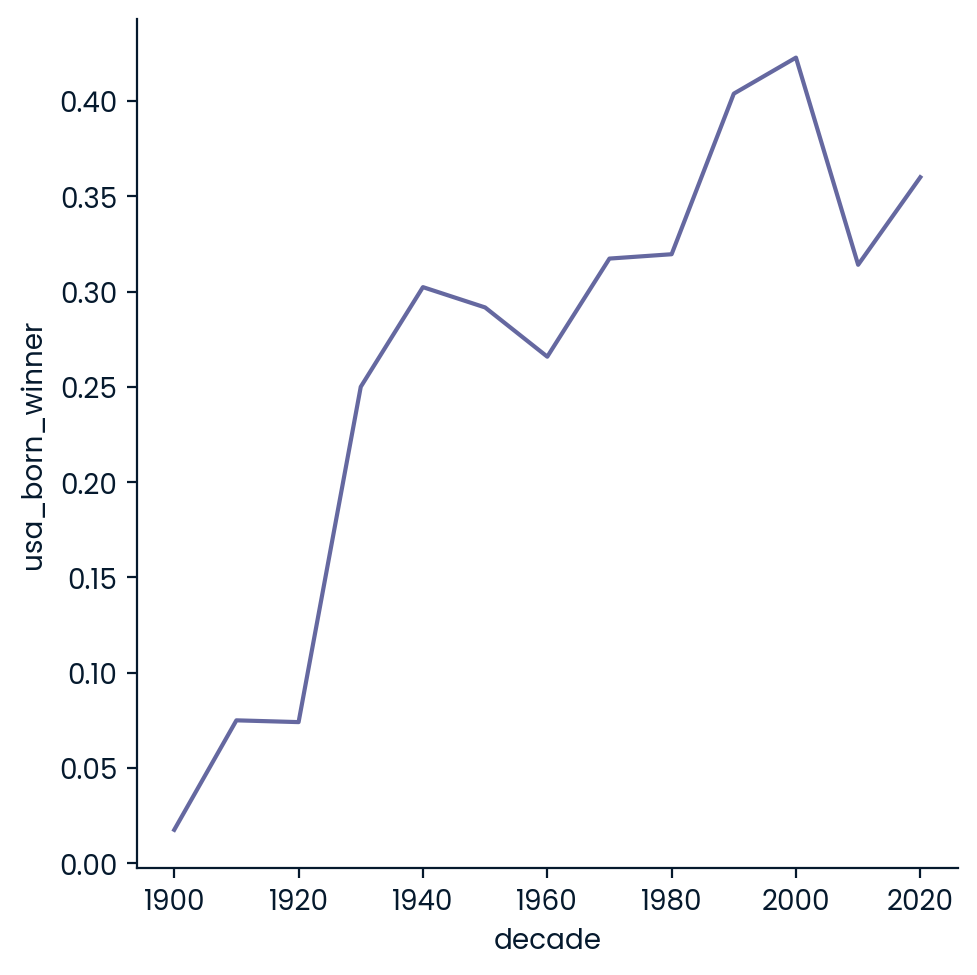

In [49]:
sns.relplot(kind='line', x='decade', y='usa_born_winner', data=prop_usa_winners)
plt.show()

In [50]:
# creating a is_female column in the dataframe to store True if female
df['is_female'] = df['sex']=='Female'

In [51]:
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,is_female
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900,False
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,1900,False
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900,False
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False,1900,False
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,False,1900,False


In [52]:
#grouping two column decade and female winner
female_winner = df.groupby(['decade','category'],  as_index=False)['is_female'].mean()

In [53]:
female_winner.head()

,decade,category,is_female
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923


In [54]:
max_female = female_winner[(female_winner['is_female'] == female_winner['is_female'].max()) & (female_winner['decade'].notnull()) & (female_winner['category'].notnull())]
max_female

,decade,category,is_female
68,2020,Literature,0.5


In [55]:
max_female_dict = {max_female['decade'].values[0]:max_female['category'].values[0]}
max_female_dict

{2020: 'Literature'}

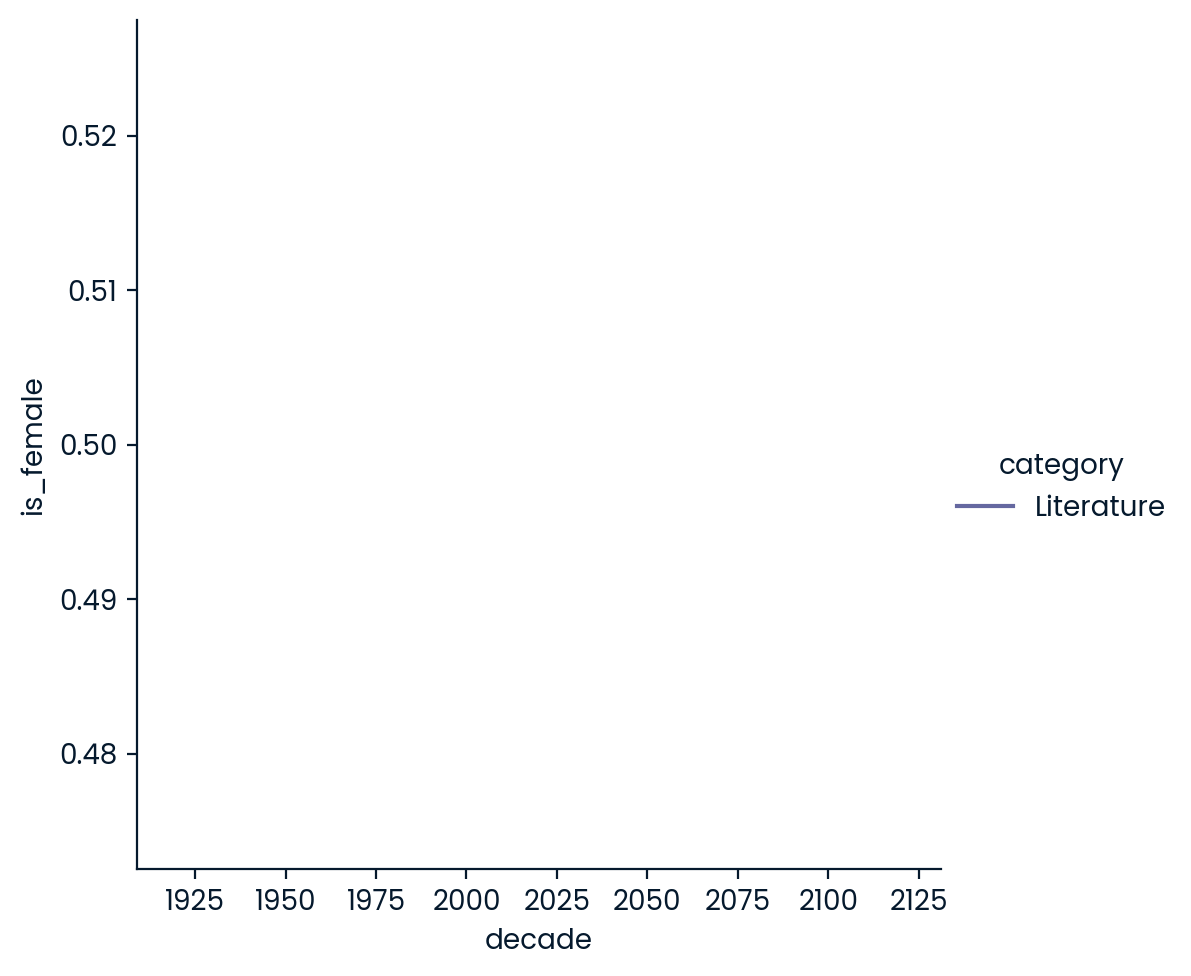

In [56]:
sns.relplot(kind='line', data=max_female, x='decade', y='is_female', hue='category')
plt.show()

In [57]:
# finding the first woman to win nobel prize
nobel_women = df[df['is_female']]
min_row = nobel_women[nobel_women['year'] == nobel_women['year'].min()]
first_woman_name= min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]
print(f"The first woman to win the novel prize is {first_woman_name} in the category of {first_woman_category}.")

The first woman to win the novel prize is Marie Curie, née Sklodowska in the category of Physics.


In [58]:
# finding repeat winners
count_winners = df['full_name'].value_counts()
count_winners.head()

Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Frederick Sanger                                                                     2
Marie Curie, née Sklodowska                                                          2
Name: full_name, dtype: int64

In [59]:
two_or_more = count_winners[count_winners >=2].index
two_or_more

Index(['Comité international de la Croix Rouge (International Committee of the Red Cross)',
       'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger',
       'Marie Curie, née Sklodowska',
       'Office of the United Nations High Commissioner for Refugees (UNHCR)'],
      dtype='object')

In [60]:
repeat_list = list(two_or_more)
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']